# Notebook for FewShotModelFlow 
## Update system path

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [2]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.client import Client
from uniflow.flow.flow_factory import FlowFactory
from uniflow.config import OpenAIFewShotConfig
from uniflow.viz import Viz

load_dotenv()

/Users/lingjiekong/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
FlowFactory.list()

['LinearFlow',
 'FewShotModelFlow',
 'ModelFlow',
 'OpenAIJsonModelFlow',
 'HuggingFaceModelFlow',
 'LMQGModelFlow']

## Run model flow to generate data

In [4]:
data = [
    {"context": """It was a sunny day and the sky color is blue.""",},
    {"context": """My name is bobby and I am a talent software engineer working on AI/ML.""",}
    ]


In [5]:
config = OpenAIFewShotConfig()
client = Client(config)

In [6]:
output = client.run(data)

['instruction: Generate one question and its corresponding answer based on the context.\n    Following the format of the examples below. The response must include original context, question, and answer.\ncontext: The quick brown fox jumps over the lazy dog.\nquestion: What is the color of the fox?\nanswer: brown.\ncontext: The quick brown fox jumps over the lazy black dog.\nquestion: What is the color of the dog?\nanswer: black.\ncontext: It was a sunny day and the sky color is blue.']


  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.86it/s]

['question: What is the color of the sky?\nanswer: blue.']
['instruction: Generate one question and its corresponding answer based on the context.\n    Following the format of the examples below. The response must include original context, question, and answer.\ncontext: The quick brown fox jumps over the lazy dog.\nquestion: What is the color of the fox?\nanswer: brown.\ncontext: The quick brown fox jumps over the lazy black dog.\nquestion: What is the color of the dog?\nanswer: black.\ncontext: My name is bobby and I am a talent software engineer working on AI/ML.']


100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

['question: What type of programming do you work on?\nanswer: AI/ML deployment.']


In [7]:
output[0]['output'][0]

{'response': [{'context': 'It was a sunny day and the sky color is blue.',
   'question': 'what is the color of the sky?',
   'answer': 'blue.'}],
 'error': 'Failed to deserialize 0 examples'}

## Plot model flow graph

In [8]:
graph = Viz.to_digraph(output[0]['root'])

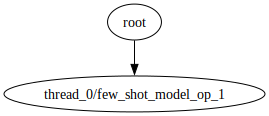

In [9]:
display(graph)

In [10]:
graph = Viz.to_digraph(output[1]['root'])

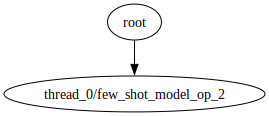

In [11]:
display(graph)